In [ ]:
# Importing modules
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
import pandas as pd
import os

In [ ]:
# Reading csv 
df=pd.read_csv("50ksample.csv", low_memory=False)
df = df.drop("Unnamed: 0", axis=1)

In [3]:
# Clean up data and fill null fields 
df['AVProductStatesIdentifier'].fillna(0, inplace= True)
df['Census_IsAlwaysOnAlwaysConnectedCapable'].fillna(0, inplace= True)
df['RtpStateBitfield'].fillna(0, inplace= True)
df['Census_IsVirtualDevice'].fillna(0, inplace= True)
df['SmartScreen'].replace('off', 'Off', inplace= True)
df['SmartScreen'].replace('on', 'On', inplace= True)
df['SmartScreen'].fillna("Off", inplace= True)
df['SmartScreen'].value_counts()
df['Wdft_IsGamer'].fillna(0, inplace= True)
df['Wdft_IsGamer'].value_counts()

In [4]:
# Create Testing DataFrame and export as csv
df= df[["AppVersion", "AVProductStatesIdentifier","Processor", "SmartScreen", "Census_MDC2FormFactor", "Census_OSVersion",
                "Census_IsAlwaysOnAlwaysConnectedCapable", "Wdft_IsGamer", "RtpStateBitfield", "IsSxsPassiveMode", "Census_HasOpticalDiskDrive", "Census_IsVirtualDevice", "HasDetections"]]
testing_df= pd.get_dummies(df, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

# testing_df.to_csv("testing.csv")

testing_df.head()

In [24]:
#testing whole data set
from sklearn.model_selection import train_test_split
testing_df_target = testing_df["HasDetections"]
testing_df_target_names = ["negative", "positive"]

testing_df_data = testing_df.drop("HasDetections", axis=1)
testing_df_feature_names = testing_df_data.columns

testing_df_X_train, testing_df_X_test, testing_df_y_train, testing_df_y_test = train_test_split(testing_df_data, testing_df_target, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(testing_df_X_train, testing_df_y_train)
print(clf.score(testing_df_X_test, testing_df_y_test))

from sklearn.ensemble import RandomForestClassifier
testing_df_rf = RandomForestClassifier(n_estimators=200)
testing_df_rf = testing_df_rf.fit(testing_df_X_train, testing_df_y_train)
print(testing_df_rf.score(testing_df_X_test, testing_df_y_test))

sorted(zip(testing_df_rf.feature_importances_, testing_df_feature_names), reverse=True)

0.5892
0.59656


[(0.2694811610455896, 'AVProductStatesIdentifier'),
 (0.06489000683403677, 'SmartScreen_ExistsNotSet'),
 (0.03262978300695489, 'Wdft_IsGamer'),
 (0.02527251416179075, 'SmartScreen_RequireAdmin'),
 (0.022178747102122812, 'Census_HasOpticalDiskDrive'),
 (0.021858899367415346, 'SmartScreen_Off'),
 (0.020233010248218358, 'Census_MDC2FormFactor_Notebook'),
 (0.01687368148386939, 'Census_MDC2FormFactor_Desktop'),
 (0.016446208658865594, 'AppVersion_4.18.1807.18075'),
 (0.012054869859797101, 'RtpStateBitfield'),
 (0.012047072996347514, 'AppVersion_4.18.1806.18062'),
 (0.011410996220115393, 'Census_OSVersion_10.0.16299.431'),
 (0.01081344333402009, 'Census_MDC2FormFactor_Convertible'),
 (0.010629495218379647, 'Census_OSVersion_10.0.17134.165'),
 (0.010479341455400103, 'Census_OSVersion_10.0.17134.228'),
 (0.010017510427140745, 'Census_IsAlwaysOnAlwaysConnectedCapable'),
 (0.009426582717147554, 'Census_OSVersion_10.0.17134.112'),
 (0.00908230792512315, 'Census_MDC2FormFactor_AllInOne'),
 (0.008

In [ ]:
# Deciding division of columns
testing_df.iloc[:, 0:8].columns

In [8]:
# Section off data 
sec1 = testing_df[['AVProductStatesIdentifier', 'Census_IsAlwaysOnAlwaysConnectedCapable',
       'Wdft_IsGamer', 'RtpStateBitfield', 'IsSxsPassiveMode', 'Census_HasOpticalDiskDrive', 'Census_IsVirtualDevice', 'HasDetections']]
sec2 = testing_df[['AppVersion_4.10.14393.0', 'AppVersion_4.10.14393.1066',
       'AppVersion_4.10.14393.1198', 'AppVersion_4.10.14393.1593',
       'AppVersion_4.10.14393.1613', 'AppVersion_4.10.14393.1794',
       'AppVersion_4.10.14393.2248', 'AppVersion_4.10.14393.2273',
       'AppVersion_4.10.14393.726', 'AppVersion_4.10.14393.953',
       'AppVersion_4.10.205.0', 'AppVersion_4.10.209.0',
       'AppVersion_4.11.15063.0', 'AppVersion_4.11.15063.1155',
       'AppVersion_4.11.15063.447', 'AppVersion_4.11.15063.994',
       'AppVersion_4.12.16299.15', 'AppVersion_4.12.17007.17123',
       'AppVersion_4.12.17007.18011', 'AppVersion_4.12.17007.18022',
       'AppVersion_4.13.17134.1', 'AppVersion_4.13.17134.112',
       'AppVersion_4.13.17134.191', 'AppVersion_4.13.17134.228',
       'AppVersion_4.13.17134.319', 'AppVersion_4.14.17613.18038',
       'AppVersion_4.14.17613.18039', 'AppVersion_4.14.17639.18041',
       'AppVersion_4.15.17643.1000', 'AppVersion_4.16.17656.18052',
       'AppVersion_4.17.17677.1000', 'AppVersion_4.18.1806.18062',
       'AppVersion_4.18.1806.20015', 'AppVersion_4.18.1806.20021',
       'AppVersion_4.18.1807.18075', 'AppVersion_4.18.1807.20063',
       'AppVersion_4.18.1809.2', 'AppVersion_4.4.304.0',
       'AppVersion_4.4.306.0', 'AppVersion_4.5.216.0', 'AppVersion_4.5.218.0',
       'AppVersion_4.6.305.0', 'AppVersion_4.7.205.0',
       'AppVersion_4.8.10240.16384', 'AppVersion_4.8.10240.17071',
       'AppVersion_4.8.10240.17113', 'AppVersion_4.8.10240.17146',
       'AppVersion_4.8.10240.17184', 'AppVersion_4.8.10240.17202',
       'AppVersion_4.8.10240.17319', 'AppVersion_4.8.10240.17354',
       'AppVersion_4.8.10240.17394', 'AppVersion_4.8.10240.17443',
       'AppVersion_4.8.10240.17609', 'AppVersion_4.8.10240.17797',
       'AppVersion_4.8.10240.17861', 'AppVersion_4.8.10240.17889',
       'AppVersion_4.8.10240.17914', 'AppVersion_4.8.10240.17918',
       'AppVersion_4.8.10240.17946', 'AppVersion_4.8.204.0',
       'AppVersion_4.8.207.0', 'AppVersion_4.9.10586.0',
       'AppVersion_4.9.10586.1045', 'AppVersion_4.9.10586.1106',
       'AppVersion_4.9.10586.494', 'AppVersion_4.9.10586.589',
       'AppVersion_4.9.10586.672', 'AppVersion_4.9.10586.839',
       'AppVersion_4.9.10586.873', 'AppVersion_4.9.10586.916',
       'AppVersion_4.9.10586.962', 'AppVersion_4.9.10586.965',
       'AppVersion_4.9.218.0', 'HasDetections']]

sec3 = testing_df[['Processor_arm64', 'Processor_x64', 'Processor_x86',
       'SmartScreen_&#x01;', 'SmartScreen_&#x02;', 'SmartScreen_Block',
       'SmartScreen_ExistsNotSet', 'SmartScreen_Off', 'SmartScreen_On',
       'SmartScreen_Prompt', 'SmartScreen_RequireAdmin', 'SmartScreen_Warn',
       'Census_MDC2FormFactor_AllInOne', 'Census_MDC2FormFactor_Convertible',
       'Census_MDC2FormFactor_Desktop', 'Census_MDC2FormFactor_Detachable',
       'Census_MDC2FormFactor_LargeServer',
       'Census_MDC2FormFactor_LargeTablet',
       'Census_MDC2FormFactor_MediumServer', 'Census_MDC2FormFactor_Notebook',
       'Census_MDC2FormFactor_PCOther', 'Census_MDC2FormFactor_ServerOther',
       'Census_MDC2FormFactor_SmallServer',
       'Census_MDC2FormFactor_SmallTablet', 'Processor_arm64', 'Processor_x64', 'Processor_x86',
       'SmartScreen_&#x01;', 'SmartScreen_&#x02;', 'SmartScreen_Block',
       'SmartScreen_ExistsNotSet', 'SmartScreen_Off', 'SmartScreen_On',
       'SmartScreen_Prompt', 'SmartScreen_RequireAdmin', 'SmartScreen_Warn',
       'Census_MDC2FormFactor_AllInOne', 'Census_MDC2FormFactor_Convertible',
       'Census_MDC2FormFactor_Desktop', 'Census_MDC2FormFactor_Detachable',
       'Census_MDC2FormFactor_LargeServer',
       'Census_MDC2FormFactor_LargeTablet',
       'Census_MDC2FormFactor_MediumServer', 'Census_MDC2FormFactor_Notebook',
       'Census_MDC2FormFactor_PCOther', 'Census_MDC2FormFactor_ServerOther',
       'Census_MDC2FormFactor_SmallServer',
       'Census_MDC2FormFactor_SmallTablet','HasDetections']]

sec4= testing_df[['Census_OSVersion_10.0.10240.16384',
       'Census_OSVersion_10.0.10240.16389',
       'Census_OSVersion_10.0.10240.16397',
       'Census_OSVersion_10.0.10240.16405',
       'Census_OSVersion_10.0.10240.16413',
       'Census_OSVersion_10.0.10240.16430',
       'Census_OSVersion_10.0.10240.16433',
       'Census_OSVersion_10.0.10240.16445',
       'Census_OSVersion_10.0.10240.16463',
       'Census_OSVersion_10.0.10240.16487',
       'Census_OSVersion_10.0.10240.16520',
       'Census_OSVersion_10.0.10240.16549',
       'Census_OSVersion_10.0.10240.16590',
       'Census_OSVersion_10.0.10240.16644',
       'Census_OSVersion_10.0.10240.16683',
       'Census_OSVersion_10.0.10240.16725',
       'Census_OSVersion_10.0.10240.16732',
       'Census_OSVersion_10.0.10240.16854',
       'Census_OSVersion_10.0.10240.16942',
       'Census_OSVersion_10.0.10240.17024',
       'Census_OSVersion_10.0.10240.17071',
       'Census_OSVersion_10.0.10240.17113',
       'Census_OSVersion_10.0.10240.17146',
       'Census_OSVersion_10.0.10240.17190',
       'Census_OSVersion_10.0.10240.17202',
       'Census_OSVersion_10.0.10240.17236',
       'Census_OSVersion_10.0.10240.17319',
       'Census_OSVersion_10.0.10240.17354',
       'Census_OSVersion_10.0.10240.17394',
       'Census_OSVersion_10.0.10240.17443',
       'Census_OSVersion_10.0.10240.17673',
       'Census_OSVersion_10.0.10240.17709',
       'Census_OSVersion_10.0.10240.17738',
       'Census_OSVersion_10.0.10240.17797',
       'Census_OSVersion_10.0.10240.17831',
       'Census_OSVersion_10.0.10240.17861',
       'Census_OSVersion_10.0.10240.17889',
       'Census_OSVersion_10.0.10240.17914',
       'Census_OSVersion_10.0.10240.17918',
       'Census_OSVersion_10.0.10240.17946',
       'Census_OSVersion_10.0.10240.17976', 'Census_OSVersion_10.0.10586.0',
       'Census_OSVersion_10.0.10586.1007', 'Census_OSVersion_10.0.10586.104',
       'Census_OSVersion_10.0.10586.1045', 'Census_OSVersion_10.0.10586.11',
       'Census_OSVersion_10.0.10586.1106', 'Census_OSVersion_10.0.10586.1176',
       'Census_OSVersion_10.0.10586.122', 'Census_OSVersion_10.0.10586.14',
       'Census_OSVersion_10.0.10586.164', 'Census_OSVersion_10.0.10586.17',
       'Census_OSVersion_10.0.10586.218', 'Census_OSVersion_10.0.10586.29',
       'Census_OSVersion_10.0.10586.3', 'Census_OSVersion_10.0.10586.318',
       'Census_OSVersion_10.0.10586.338', 'Census_OSVersion_10.0.10586.36',
       'Census_OSVersion_10.0.10586.420', 'Census_OSVersion_10.0.10586.446',
       'Census_OSVersion_10.0.10586.456', 'Census_OSVersion_10.0.10586.494',
       'Census_OSVersion_10.0.10586.499', 'Census_OSVersion_10.0.10586.545',
       'Census_OSVersion_10.0.10586.589', 'Census_OSVersion_10.0.10586.63',
       'Census_OSVersion_10.0.10586.633', 'Census_OSVersion_10.0.10586.679',
       'Census_OSVersion_10.0.10586.71', 'Census_OSVersion_10.0.10586.713',
       'Census_OSVersion_10.0.10586.753', 'Census_OSVersion_10.0.10586.839',
       'Census_OSVersion_10.0.10586.873', 'Census_OSVersion_10.0.10586.916',
       'Census_OSVersion_10.0.10586.962', 'Census_OSVersion_10.0.14393.0',
       'Census_OSVersion_10.0.14393.10', 'Census_OSVersion_10.0.14393.103',
       'Census_OSVersion_10.0.14393.105', 'Census_OSVersion_10.0.14393.1066',
       'Census_OSVersion_10.0.14393.1198', 'Census_OSVersion_10.0.14393.1358',
       'Census_OSVersion_10.0.14393.1378', 'Census_OSVersion_10.0.14393.1480',
       'Census_OSVersion_10.0.14393.1532', 'Census_OSVersion_10.0.14393.1593',
       'Census_OSVersion_10.0.14393.1715', 'Census_OSVersion_10.0.14393.1770',
       'Census_OSVersion_10.0.14393.187', 'Census_OSVersion_10.0.14393.1884',
       'Census_OSVersion_10.0.14393.1914', 'Census_OSVersion_10.0.14393.1944',
       'Census_OSVersion_10.0.14393.2007', 'Census_OSVersion_10.0.14393.2035','Census_OSVersion_10.0.10240.16384',
       'Census_OSVersion_10.0.10240.16389',
       'Census_OSVersion_10.0.10240.16397',
       'Census_OSVersion_10.0.10240.16405',
       'Census_OSVersion_10.0.10240.16413',
       'Census_OSVersion_10.0.10240.16430',
       'Census_OSVersion_10.0.10240.16433',
       'Census_OSVersion_10.0.10240.16445',
       'Census_OSVersion_10.0.10240.16463',
       'Census_OSVersion_10.0.10240.16487',
       'Census_OSVersion_10.0.10240.16520',
       'Census_OSVersion_10.0.10240.16549',
       'Census_OSVersion_10.0.10240.16590',
       'Census_OSVersion_10.0.10240.16644',
       'Census_OSVersion_10.0.10240.16683',
       'Census_OSVersion_10.0.10240.16725',
       'Census_OSVersion_10.0.10240.16732',
       'Census_OSVersion_10.0.10240.16854',
       'Census_OSVersion_10.0.10240.16942',
       'Census_OSVersion_10.0.10240.17024',
       'Census_OSVersion_10.0.10240.17071',
       'Census_OSVersion_10.0.10240.17113',
       'Census_OSVersion_10.0.10240.17146',
       'Census_OSVersion_10.0.10240.17190',
       'Census_OSVersion_10.0.10240.17202',
       'Census_OSVersion_10.0.10240.17236',
       'Census_OSVersion_10.0.10240.17319',
       'Census_OSVersion_10.0.10240.17354',
       'Census_OSVersion_10.0.10240.17394',
       'Census_OSVersion_10.0.10240.17443',
       'Census_OSVersion_10.0.10240.17673',
       'Census_OSVersion_10.0.10240.17709',
       'Census_OSVersion_10.0.10240.17738',
       'Census_OSVersion_10.0.10240.17797',
       'Census_OSVersion_10.0.10240.17831',
       'Census_OSVersion_10.0.10240.17861',
       'Census_OSVersion_10.0.10240.17889',
       'Census_OSVersion_10.0.10240.17914',
       'Census_OSVersion_10.0.10240.17918',
       'Census_OSVersion_10.0.10240.17946',
       'Census_OSVersion_10.0.10240.17976', 'Census_OSVersion_10.0.10586.0',
       'Census_OSVersion_10.0.10586.1007', 'Census_OSVersion_10.0.10586.104',
       'Census_OSVersion_10.0.10586.1045', 'Census_OSVersion_10.0.10586.11',
       'Census_OSVersion_10.0.10586.1106', 'Census_OSVersion_10.0.10586.1176',
       'Census_OSVersion_10.0.10586.122', 'Census_OSVersion_10.0.10586.14',
       'Census_OSVersion_10.0.10586.164', 'Census_OSVersion_10.0.10586.17',
       'Census_OSVersion_10.0.10586.218', 'Census_OSVersion_10.0.10586.29',
       'Census_OSVersion_10.0.10586.3', 'Census_OSVersion_10.0.10586.318',
       'Census_OSVersion_10.0.10586.338', 'Census_OSVersion_10.0.10586.36',
       'Census_OSVersion_10.0.10586.420', 'Census_OSVersion_10.0.10586.446',
       'Census_OSVersion_10.0.10586.456', 'Census_OSVersion_10.0.10586.494',
       'Census_OSVersion_10.0.10586.499', 'Census_OSVersion_10.0.10586.545',
       'Census_OSVersion_10.0.10586.589', 'Census_OSVersion_10.0.10586.63',
       'Census_OSVersion_10.0.10586.633', 'Census_OSVersion_10.0.10586.679',
       'Census_OSVersion_10.0.10586.71', 'Census_OSVersion_10.0.10586.713',
       'Census_OSVersion_10.0.10586.753', 'Census_OSVersion_10.0.10586.839',
       'Census_OSVersion_10.0.10586.873', 'Census_OSVersion_10.0.10586.916',
       'Census_OSVersion_10.0.10586.962', 'Census_OSVersion_10.0.14393.0',
       'Census_OSVersion_10.0.14393.10', 'Census_OSVersion_10.0.14393.103',
       'Census_OSVersion_10.0.14393.105', 'Census_OSVersion_10.0.14393.1066',
       'Census_OSVersion_10.0.14393.1198', 'Census_OSVersion_10.0.14393.1358',
       'Census_OSVersion_10.0.14393.1378', 'Census_OSVersion_10.0.14393.1480',
       'Census_OSVersion_10.0.14393.1532', 'Census_OSVersion_10.0.14393.1593',
       'Census_OSVersion_10.0.14393.1715', 'Census_OSVersion_10.0.14393.1770',
       'Census_OSVersion_10.0.14393.187', 'Census_OSVersion_10.0.14393.1884',
       'Census_OSVersion_10.0.14393.1914', 'Census_OSVersion_10.0.14393.1944',
       'Census_OSVersion_10.0.14393.2007', 'Census_OSVersion_10.0.14393.2035','Census_OSVersion_10.0.15063.447', 'Census_OSVersion_10.0.15063.483',
       'Census_OSVersion_10.0.15063.502', 'Census_OSVersion_10.0.15063.540',
       'Census_OSVersion_10.0.15063.608', 'Census_OSVersion_10.0.15063.632',
       'Census_OSVersion_10.0.15063.674', 'Census_OSVersion_10.0.15063.726',
       'Census_OSVersion_10.0.15063.729', 'Census_OSVersion_10.0.15063.786',
       'Census_OSVersion_10.0.15063.850', 'Census_OSVersion_10.0.15063.877',
       'Census_OSVersion_10.0.15063.909', 'Census_OSVersion_10.0.15063.936',
       'Census_OSVersion_10.0.15063.966', 'Census_OSVersion_10.0.15063.994',
       'Census_OSVersion_10.0.16299.125', 'Census_OSVersion_10.0.16299.15',
       'Census_OSVersion_10.0.16299.19', 'Census_OSVersion_10.0.16299.192',
       'Census_OSVersion_10.0.16299.214', 'Census_OSVersion_10.0.16299.248',
       'Census_OSVersion_10.0.16299.251', 'Census_OSVersion_10.0.16299.309',
       'Census_OSVersion_10.0.16299.334', 'Census_OSVersion_10.0.16299.371',
       'Census_OSVersion_10.0.16299.402', 'Census_OSVersion_10.0.16299.431',
       'Census_OSVersion_10.0.16299.461', 'Census_OSVersion_10.0.16299.492',
       'Census_OSVersion_10.0.16299.522', 'Census_OSVersion_10.0.16299.547',
       'Census_OSVersion_10.0.16299.551', 'Census_OSVersion_10.0.16299.579',
       'Census_OSVersion_10.0.16299.611', 'Census_OSVersion_10.0.16299.637',
       'Census_OSVersion_10.0.16299.64', 'Census_OSVersion_10.0.16299.665',
       'Census_OSVersion_10.0.16299.666', 'Census_OSVersion_10.0.16299.98',
       'Census_OSVersion_10.0.17134.1', 'Census_OSVersion_10.0.17134.112',
       'Census_OSVersion_10.0.17134.137', 'Census_OSVersion_10.0.17134.165',
       'Census_OSVersion_10.0.17134.167', 'Census_OSVersion_10.0.17134.191',
       'Census_OSVersion_10.0.17134.228', 'Census_OSVersion_10.0.17134.254',
       'Census_OSVersion_10.0.17134.285', 'Census_OSVersion_10.0.17134.286',
       'Census_OSVersion_10.0.17134.319', 'Census_OSVersion_10.0.17134.48',
       'Census_OSVersion_10.0.17134.5', 'Census_OSVersion_10.0.17134.81',
       'Census_OSVersion_10.0.17134.83', 'Census_OSVersion_10.0.17627.1000',
       'Census_OSVersion_10.0.17643.1000', 'Census_OSVersion_10.0.17666.1000',
       'Census_OSVersion_10.0.17677.1000', 'Census_OSVersion_10.0.17686.1003',
       'Census_OSVersion_10.0.17692.1000', 'Census_OSVersion_10.0.17692.1004',
       'Census_OSVersion_10.0.17713.1002', 'Census_OSVersion_10.0.17733.1000',
       'Census_OSVersion_10.0.17735.1000', 'Census_OSVersion_10.0.17738.1000',
       'Census_OSVersion_10.0.17741.1000', 'Census_OSVersion_10.0.17744.1001',
       'Census_OSVersion_10.0.17744.1003', 'Census_OSVersion_10.0.17744.1004',
       'Census_OSVersion_10.0.17746.1000', 'Census_OSVersion_10.0.17747.1000',
       'Census_OSVersion_10.0.17751.1', 'Census_OSVersion_10.0.17754.1',
       'Census_OSVersion_10.0.17755.1', 'Census_OSVersion_10.0.17758.1',
       'Census_OSVersion_10.0.17758.4', 'Census_OSVersion_10.0.17760.1',
       'Census_OSVersion_10.0.17763.1', 'Census_OSVersion_10.0.18234.1000', 'HasDetections']]


In [9]:
# Run ML Random Forest Algo on sectioned data

sec1_target = sec1["HasDetections"]
sec1_target_names = ["negative", "positive"]

sec1_data = sec1.drop("HasDetections", axis=1)
sec1_feature_names = sec1_data.columns

sec1_X_train, sec1_X_test, sec1_y_train, sec1_y_test = train_test_split(sec1_data, sec1_target, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(sec1_X_train, sec1_y_train)
clf.score(sec1_X_test, sec1_y_test)


0.5908

In [10]:
sec1_rf = RandomForestClassifier(n_estimators=200)
sec1_rf = sec1_rf.fit(sec1_X_train, sec1_y_train)
sec1_rf.score(sec1_X_test, sec1_y_test)

0.59

In [11]:
sorted(zip(sec1_rf.feature_importances_, sec1_feature_names), reverse=True) 

[(0.8351342837904049, 'AVProductStatesIdentifier'),
 (0.04184528371814956, 'Wdft_IsGamer'),
 (0.04133245948678898, 'Census_IsAlwaysOnAlwaysConnectedCapable'),
 (0.030883027844999012, 'Census_IsVirtualDevice'),
 (0.02844803678615349, 'RtpStateBitfield'),
 (0.016440451564952517, 'Census_HasOpticalDiskDrive'),
 (0.0059164568085510625, 'IsSxsPassiveMode')]

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


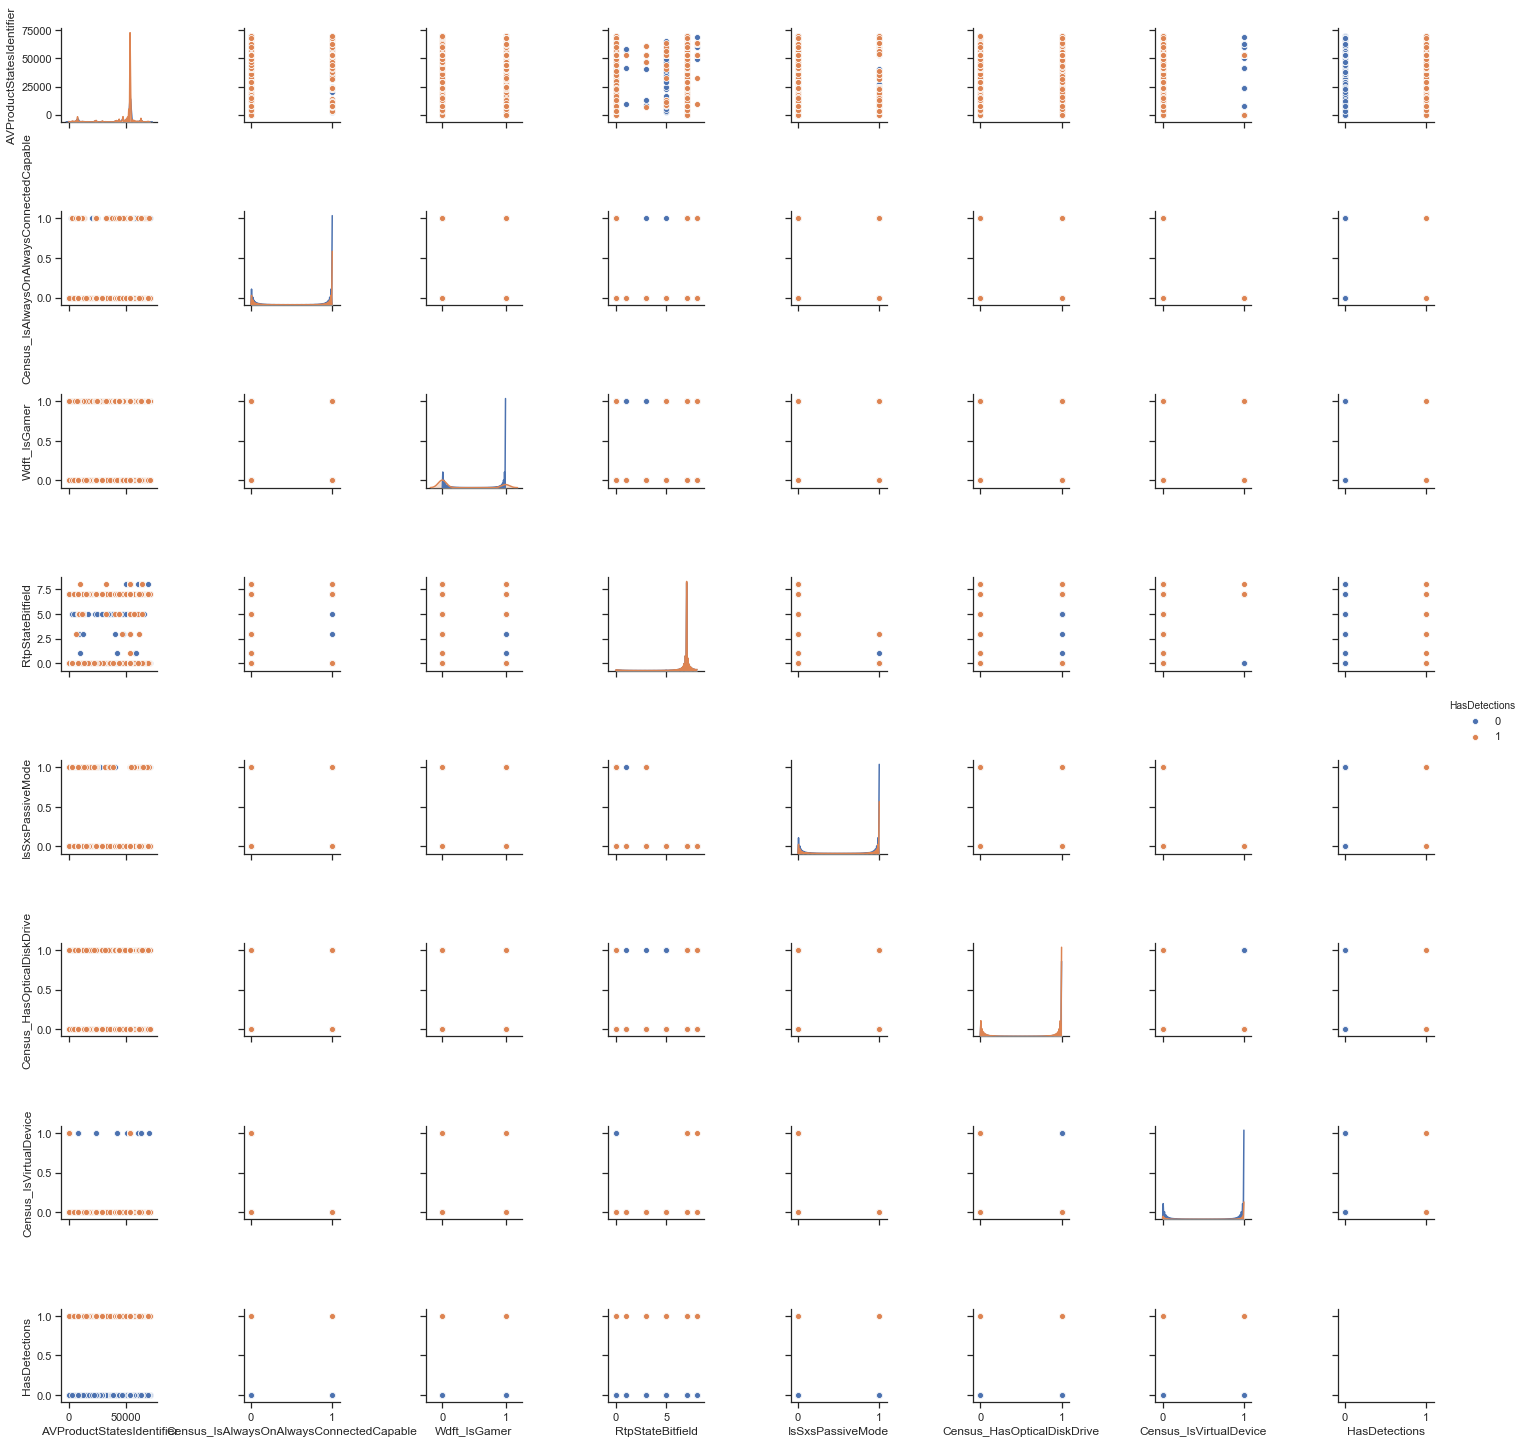

In [12]:
#Plotting Data
g=sns.pairplot(sec1, hue="HasDetections")

In [13]:
sec2_target = sec2["HasDetections"]
sec2_target_names = ["negative", "positive"]

sec2_data = sec2.drop("HasDetections", axis=1)
sec2_feature_names = sec2_data.columns

sec2_X_train, sec2_X_test, sec2_y_train, sec2_y_test = train_test_split(sec2_data, sec2_target, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(sec2_X_train, sec2_y_train)
print(clf.score(sec2_X_test, sec2_y_test))

sec2_rf = RandomForestClassifier(n_estimators=200)
sec2_rf = sec2_rf.fit(sec2_X_train, sec2_y_train)
print(sec2_rf.score(sec2_X_test, sec2_y_test))
sorted(zip(sec2_rf.feature_importances_, sec2_feature_names), reverse=True)

0.53312
0.53312


[(0.22013901365783287, 'AppVersion_4.18.1807.18075'),
 (0.1952226199306787, 'AppVersion_4.14.17639.18041'),
 (0.15751698666002067, 'AppVersion_4.16.17656.18052'),
 (0.08771852541124009, 'AppVersion_4.14.17613.18039'),
 (0.029057462249051712, 'AppVersion_4.13.17134.1'),
 (0.02412389437153936, 'AppVersion_4.13.17134.228'),
 (0.022704675747076367, 'AppVersion_4.12.17007.18022'),
 (0.01600160834939946, 'AppVersion_4.18.1806.18062'),
 (0.012780824202698654, 'AppVersion_4.10.14393.0'),
 (0.011742111448402632, 'AppVersion_4.12.16299.15'),
 (0.01168984531689155, 'AppVersion_4.11.15063.1155'),
 (0.009782975964751436, 'AppVersion_4.9.10586.1106'),
 (0.008542485283544473, 'AppVersion_4.8.10240.17443'),
 (0.008396698948197834, 'AppVersion_4.11.15063.0'),
 (0.008100486488729332, 'AppVersion_4.10.209.0'),
 (0.006767155362772349, 'AppVersion_4.9.10586.672'),
 (0.0067053386541038925, 'AppVersion_4.8.10240.17914'),
 (0.005873285866044975, 'AppVersion_4.12.17007.18011'),
 (0.005683259184207615, 'AppVers

In [14]:
sec3_target = sec3["HasDetections"]
sec3_target_names = ["negative", "positive"]

sec3_data = sec3.drop("HasDetections", axis=1)
sec3_feature_names = sec3_data.columns

sec3_X_train, sec3_X_test, sec3_y_train, sec3_y_test = train_test_split(sec3_data, sec3_target, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(sec3_X_train, sec3_y_train)
print(clf.score(sec3_X_test, sec3_y_test))

sec3_rf = RandomForestClassifier(n_estimators=200)
sec3_rf = sec3_rf.fit(sec3_X_train, sec3_y_train)
print(sec3_rf.score(sec3_X_test, sec3_y_test))


sorted(zip(sec3_rf.feature_importances_, sec3_feature_names), reverse=True)

0.57696
0.57696


[(0.29443732952034624, 'SmartScreen_ExistsNotSet'),
 (0.28276895450393963, 'SmartScreen_ExistsNotSet'),
 (0.07116704247758797, 'SmartScreen_RequireAdmin'),
 (0.06712440847368349, 'SmartScreen_Off'),
 (0.061923905322645814, 'SmartScreen_RequireAdmin'),
 (0.0472722022368981, 'SmartScreen_Off'),
 (0.018013742378571007, 'Processor_x86'),
 (0.016219000387386367, 'Processor_x64'),
 (0.015252837173027783, 'Processor_x64'),
 (0.01479684506903348, 'Processor_x86'),
 (0.01245902471603193, 'Census_MDC2FormFactor_Detachable'),
 (0.0117738442596518, 'Census_MDC2FormFactor_Detachable'),
 (0.007714732409650518, 'Census_MDC2FormFactor_Desktop'),
 (0.0074837648095763334, 'Census_MDC2FormFactor_Desktop'),
 (0.00623671514169215, 'SmartScreen_Warn'),
 (0.005200057102478118, 'Census_MDC2FormFactor_SmallTablet'),
 (0.005067563950111282, 'SmartScreen_Warn'),
 (0.0046810683052698095, 'Census_MDC2FormFactor_LargeTablet'),
 (0.004674008132598016, 'Census_MDC2FormFactor_SmallTablet'),
 (0.0041117301702502775, 'C

In [15]:
sec4_target = sec4["HasDetections"]
sec4_target_names = ["negative", "positive"]

sec4_data = sec4.drop("HasDetections", axis=1)
sec4_feature_names = sec4_data.columns

sec4_X_train, sec4_X_test, sec4_y_train, sec4_y_test = train_test_split(sec4_data, sec4_target, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(sec4_X_train, sec4_y_train)
print(clf.score(sec4_X_test, sec4_y_test))

sec4_rf = RandomForestClassifier(n_estimators=200)
sec4_rf = sec4_rf.fit(sec4_X_train, sec4_y_train)
print(sec4_rf.score(sec4_X_test, sec4_y_test))


sorted(zip(sec4_rf.feature_importances_, sec4_feature_names), reverse=True)

0.52824
0.52808


[(0.16531660909753626, 'Census_OSVersion_10.0.17134.165'),
 (0.05797791411101, 'Census_OSVersion_10.0.17134.228'),
 (0.029182034423466605, 'Census_OSVersion_10.0.16299.665'),
 (0.026278643479037148, 'Census_OSVersion_10.0.16299.547'),
 (0.02222005113590023, 'Census_OSVersion_10.0.16299.611'),
 (0.01812955540345487, 'Census_OSVersion_10.0.16299.371'),
 (0.017027519447528786, 'Census_OSVersion_10.0.16299.461'),
 (0.014528440840176323, 'Census_OSVersion_10.0.16299.579'),
 (0.014371060284932647, 'Census_OSVersion_10.0.16299.15'),
 (0.01239184926056625, 'Census_OSVersion_10.0.16299.666'),
 (0.011288939117668767, 'Census_OSVersion_10.0.17758.1'),
 (0.011054670629161031, 'Census_OSVersion_10.0.15063.786'),
 (0.011038631291005624, 'Census_OSVersion_10.0.15063.966'),
 (0.010678947437128243, 'Census_OSVersion_10.0.15063.729'),
 (0.010573354389273603, 'Census_OSVersion_10.0.16299.125'),
 (0.009805182159569397, 'Census_OSVersion_10.0.16299.431'),
 (0.009683878637577845, 'Census_OSVersion_10.0.1506

In [16]:
#new data set with only features that had a .01 accuracy from above tests. 41 features identified. 42nd is has detections

condensed_df= testing_df[[ 'AppVersion_4.10.14393.0',
'AppVersion_4.12.16299.15',
 'AppVersion_4.12.17007.18022',
 'AppVersion_4.13.17134.1',
 'AppVersion_4.13.17134.228',
 'AppVersion_4.14.17613.18039',
 'AppVersion_4.14.17639.18041',
 'AppVersion_4.16.17656.18052',
 'AppVersion_4.18.1806.18062',
 'AppVersion_4.18.1807.18075',
 'AVProductStatesIdentifier',
 'Census_HasOpticalDiskDrive',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Census_IsVirtualDevice',
 'Census_MDC2FormFactor_Convertible',
 'Census_MDC2FormFactor_Desktop',
 'Census_MDC2FormFactor_Detachable',
 'Census_MDC2FormFactor_Notebook',
 'Census_OSVersion_10.0.15063.729',
 'Census_OSVersion_10.0.15063.786',
 'Census_OSVersion_10.0.15063.966',
 'Census_OSVersion_10.0.16299.125',
 'Census_OSVersion_10.0.16299.15',
 'Census_OSVersion_10.0.16299.371',
 'Census_OSVersion_10.0.16299.431',
 'Census_OSVersion_10.0.16299.461',
 'Census_OSVersion_10.0.16299.547',
 'Census_OSVersion_10.0.16299.579',
 'Census_OSVersion_10.0.16299.611',
 'Census_OSVersion_10.0.16299.665',
 'Census_OSVersion_10.0.16299.666',
 'Census_OSVersion_10.0.17134.165',
 'Census_OSVersion_10.0.17134.228',
 'Census_OSVersion_10.0.17758.1',
 'Processor_x64',
 'Processor_x86',
 'RtpStateBitfield',
 'SmartScreen_ExistsNotSet',
 'SmartScreen_Off',
 'SmartScreen_RequireAdmin',
 'Wdft_IsGamer', 'HasDetections']]

condensed_df_target = condensed_df["HasDetections"]
condensed_df_target_names = ["negative", "positive"]

condensed_df_data = condensed_df.drop("HasDetections", axis=1)
condensed_df_feature_names = condensed_df_data.columns

condensed_df_X_train, condensed_df_X_test, condensed_df_y_train, condensed_df_y_test = train_test_split(condensed_df_data, condensed_df_target, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(condensed_df_X_train, condensed_df_y_train)
print(clf.score(condensed_df_X_test, condensed_df_y_test))

condensed_df_rf = RandomForestClassifier(n_estimators=200)
condensed_df_rf = condensed_df_rf.fit(condensed_df_X_train, condensed_df_y_train)
print(condensed_df_rf.score(condensed_df_X_test, condensed_df_y_test))


sorted(zip(condensed_df_rf.feature_importances_, condensed_df_feature_names), reverse=True)


0.5904
0.6004


[(0.3874486892549073, 'AVProductStatesIdentifier'),
 (0.09681935340867837, 'SmartScreen_ExistsNotSet'),
 (0.036885518917694475, 'Wdft_IsGamer'),
 (0.0328456886603137, 'SmartScreen_Off'),
 (0.032394473695715, 'SmartScreen_RequireAdmin'),
 (0.027854709171314843, 'Census_HasOpticalDiskDrive'),
 (0.02702304570396263, 'Census_MDC2FormFactor_Notebook'),
 (0.023118059163103496, 'AppVersion_4.18.1807.18075'),
 (0.022081056017590223, 'Census_MDC2FormFactor_Desktop'),
 (0.020998976716923683, 'RtpStateBitfield'),
 (0.020354514258460674, 'Census_OSVersion_10.0.16299.431'),
 (0.01968856482363493, 'Census_OSVersion_10.0.17134.228'),
 (0.019590413822520202, 'Census_OSVersion_10.0.17134.165'),
 (0.018314549708823336, 'AppVersion_4.18.1806.18062'),
 (0.015390022056860965, 'Census_OSVersion_10.0.16299.371'),
 (0.014775575606810667, 'Census_OSVersion_10.0.16299.547'),
 (0.014756110411623034, 'Census_MDC2FormFactor_Convertible'),
 (0.01383204944726168, 'Census_OSVersion_10.0.16299.125'),
 (0.0134600232895

In [23]:
# new df with all columns relating to features for which even one in the above sections scored .03 or higher 

improved_df= testing_df[['AVProductStatesIdentifier', 'Census_IsAlwaysOnAlwaysConnectedCapable',
       'Wdft_IsGamer', 'HasDetections', 'Wdft_IsGamer', 'Census_IsVirtualDevice', 'AppVersion_4.10.14393.0', 'AppVersion_4.10.14393.1066',
       'AppVersion_4.10.14393.1198', 'AppVersion_4.10.14393.1593',
       'AppVersion_4.10.14393.1613', 'AppVersion_4.10.14393.1794',
       'AppVersion_4.10.14393.2248', 'AppVersion_4.10.14393.2273',
       'AppVersion_4.10.14393.726', 'AppVersion_4.10.14393.953',
       'AppVersion_4.10.205.0', 'AppVersion_4.10.209.0',
       'AppVersion_4.11.15063.0', 'AppVersion_4.11.15063.1155',
       'AppVersion_4.11.15063.447', 'AppVersion_4.11.15063.994',
       'AppVersion_4.12.16299.15', 'AppVersion_4.12.17007.17123',
       'AppVersion_4.12.17007.18011', 'AppVersion_4.12.17007.18022',
       'AppVersion_4.13.17134.1', 'AppVersion_4.13.17134.112',
       'AppVersion_4.13.17134.191', 'AppVersion_4.13.17134.228',
       'AppVersion_4.13.17134.319', 'AppVersion_4.14.17613.18038',
       'AppVersion_4.14.17613.18039', 'AppVersion_4.14.17639.18041',
       'AppVersion_4.15.17643.1000', 'AppVersion_4.16.17656.18052',
       'AppVersion_4.17.17677.1000', 'AppVersion_4.18.1806.18062',
       'AppVersion_4.18.1806.20015', 'AppVersion_4.18.1806.20021',
       'AppVersion_4.18.1807.18075', 'AppVersion_4.18.1807.20063',
       'AppVersion_4.18.1809.2', 'AppVersion_4.4.304.0',
       'AppVersion_4.4.306.0', 'AppVersion_4.5.216.0', 'AppVersion_4.5.218.0',
       'AppVersion_4.6.305.0', 'AppVersion_4.7.205.0',
       'AppVersion_4.8.10240.16384', 'AppVersion_4.8.10240.17071',
       'AppVersion_4.8.10240.17113', 'AppVersion_4.8.10240.17146',
       'AppVersion_4.8.10240.17184', 'AppVersion_4.8.10240.17202',
       'AppVersion_4.8.10240.17319', 'AppVersion_4.8.10240.17354',
       'AppVersion_4.8.10240.17394', 'AppVersion_4.8.10240.17443',
       'AppVersion_4.8.10240.17609', 'AppVersion_4.8.10240.17797',
       'AppVersion_4.8.10240.17861', 'AppVersion_4.8.10240.17889',
       'AppVersion_4.8.10240.17914', 'AppVersion_4.8.10240.17918',
       'AppVersion_4.8.10240.17946', 'AppVersion_4.8.204.0',
       'AppVersion_4.8.207.0', 'AppVersion_4.9.10586.0',
       'AppVersion_4.9.10586.1045', 'AppVersion_4.9.10586.1106',
       'AppVersion_4.9.10586.494', 'AppVersion_4.9.10586.589',
       'AppVersion_4.9.10586.672', 'AppVersion_4.9.10586.839',
       'AppVersion_4.9.10586.873', 'AppVersion_4.9.10586.916',
       'AppVersion_4.9.10586.962', 'AppVersion_4.9.10586.965',
       'AppVersion_4.9.218.0', 'SmartScreen_&#x01;', 'SmartScreen_&#x02;', 'SmartScreen_Block',
       'SmartScreen_ExistsNotSet', 'SmartScreen_Off', 'SmartScreen_On',
       'SmartScreen_Prompt', 'SmartScreen_RequireAdmin', 'SmartScreen_Warn', 'Census_OSVersion_10.0.10240.16384',
       'Census_OSVersion_10.0.10240.16389',
       'Census_OSVersion_10.0.10240.16397',
       'Census_OSVersion_10.0.10240.16405',
       'Census_OSVersion_10.0.10240.16413',
       'Census_OSVersion_10.0.10240.16430',
       'Census_OSVersion_10.0.10240.16433',
       'Census_OSVersion_10.0.10240.16445',
       'Census_OSVersion_10.0.10240.16463',
       'Census_OSVersion_10.0.10240.16487',
       'Census_OSVersion_10.0.10240.16520',
       'Census_OSVersion_10.0.10240.16549',
       'Census_OSVersion_10.0.10240.16590',
       'Census_OSVersion_10.0.10240.16644',
       'Census_OSVersion_10.0.10240.16683',
       'Census_OSVersion_10.0.10240.16725',
       'Census_OSVersion_10.0.10240.16732',
       'Census_OSVersion_10.0.10240.16854',
       'Census_OSVersion_10.0.10240.16942',
       'Census_OSVersion_10.0.10240.17024',
       'Census_OSVersion_10.0.10240.17071',
       'Census_OSVersion_10.0.10240.17113',
       'Census_OSVersion_10.0.10240.17146',
       'Census_OSVersion_10.0.10240.17190',
       'Census_OSVersion_10.0.10240.17202',
       'Census_OSVersion_10.0.10240.17236',
       'Census_OSVersion_10.0.10240.17319',
       'Census_OSVersion_10.0.10240.17354',
       'Census_OSVersion_10.0.10240.17394',
       'Census_OSVersion_10.0.10240.17443',
       'Census_OSVersion_10.0.10240.17673',
       'Census_OSVersion_10.0.10240.17709',
       'Census_OSVersion_10.0.10240.17738',
       'Census_OSVersion_10.0.10240.17797',
       'Census_OSVersion_10.0.10240.17831',
       'Census_OSVersion_10.0.10240.17861',
       'Census_OSVersion_10.0.10240.17889',
       'Census_OSVersion_10.0.10240.17914',
       'Census_OSVersion_10.0.10240.17918',
       'Census_OSVersion_10.0.10240.17946',
       'Census_OSVersion_10.0.10240.17976', 'Census_OSVersion_10.0.10586.0',
       'Census_OSVersion_10.0.10586.1007', 'Census_OSVersion_10.0.10586.104',
       'Census_OSVersion_10.0.10586.1045', 'Census_OSVersion_10.0.10586.11',
       'Census_OSVersion_10.0.10586.1106', 'Census_OSVersion_10.0.10586.1176',
       'Census_OSVersion_10.0.10586.122', 'Census_OSVersion_10.0.10586.14',
       'Census_OSVersion_10.0.10586.164', 'Census_OSVersion_10.0.10586.17',
       'Census_OSVersion_10.0.10586.218', 'Census_OSVersion_10.0.10586.29',
       'Census_OSVersion_10.0.10586.3', 'Census_OSVersion_10.0.10586.318',
       'Census_OSVersion_10.0.10586.338', 'Census_OSVersion_10.0.10586.36',
       'Census_OSVersion_10.0.10586.420', 'Census_OSVersion_10.0.10586.446',
       'Census_OSVersion_10.0.10586.456', 'Census_OSVersion_10.0.10586.494',
       'Census_OSVersion_10.0.10586.499', 'Census_OSVersion_10.0.10586.545',
       'Census_OSVersion_10.0.10586.589', 'Census_OSVersion_10.0.10586.63',
       'Census_OSVersion_10.0.10586.633', 'Census_OSVersion_10.0.10586.679',
       'Census_OSVersion_10.0.10586.71', 'Census_OSVersion_10.0.10586.713',
       'Census_OSVersion_10.0.10586.753', 'Census_OSVersion_10.0.10586.839',
       'Census_OSVersion_10.0.10586.873', 'Census_OSVersion_10.0.10586.916',
       'Census_OSVersion_10.0.10586.962', 'Census_OSVersion_10.0.14393.0',
       'Census_OSVersion_10.0.14393.10', 'Census_OSVersion_10.0.14393.103',
       'Census_OSVersion_10.0.14393.105', 'Census_OSVersion_10.0.14393.1066',
       'Census_OSVersion_10.0.14393.1198', 'Census_OSVersion_10.0.14393.1358',
       'Census_OSVersion_10.0.14393.1378', 'Census_OSVersion_10.0.14393.1480',
       'Census_OSVersion_10.0.14393.1532', 'Census_OSVersion_10.0.14393.1593',
       'Census_OSVersion_10.0.14393.1715', 'Census_OSVersion_10.0.14393.1770',
       'Census_OSVersion_10.0.14393.187', 'Census_OSVersion_10.0.14393.1884',
       'Census_OSVersion_10.0.14393.1914', 'Census_OSVersion_10.0.14393.1944',
       'Census_OSVersion_10.0.14393.2007', 'Census_OSVersion_10.0.14393.2035','Census_OSVersion_10.0.10240.16384',
       'Census_OSVersion_10.0.10240.16389',
       'Census_OSVersion_10.0.10240.16397',
       'Census_OSVersion_10.0.10240.16405',
       'Census_OSVersion_10.0.10240.16413',
       'Census_OSVersion_10.0.10240.16430',
       'Census_OSVersion_10.0.10240.16433',
       'Census_OSVersion_10.0.10240.16445',
       'Census_OSVersion_10.0.10240.16463',
       'Census_OSVersion_10.0.10240.16487',
       'Census_OSVersion_10.0.10240.16520',
       'Census_OSVersion_10.0.10240.16549',
       'Census_OSVersion_10.0.10240.16590',
       'Census_OSVersion_10.0.10240.16644',
       'Census_OSVersion_10.0.10240.16683',
       'Census_OSVersion_10.0.10240.16725',
       'Census_OSVersion_10.0.10240.16732',
       'Census_OSVersion_10.0.10240.16854',
       'Census_OSVersion_10.0.10240.16942',
       'Census_OSVersion_10.0.10240.17024',
       'Census_OSVersion_10.0.10240.17071',
       'Census_OSVersion_10.0.10240.17113',
       'Census_OSVersion_10.0.10240.17146',
       'Census_OSVersion_10.0.10240.17190',
       'Census_OSVersion_10.0.10240.17202',
       'Census_OSVersion_10.0.10240.17236',
       'Census_OSVersion_10.0.10240.17319',
       'Census_OSVersion_10.0.10240.17354',
       'Census_OSVersion_10.0.10240.17394',
       'Census_OSVersion_10.0.10240.17443',
       'Census_OSVersion_10.0.10240.17673',
       'Census_OSVersion_10.0.10240.17709',
       'Census_OSVersion_10.0.10240.17738',
       'Census_OSVersion_10.0.10240.17797',
       'Census_OSVersion_10.0.10240.17831',
       'Census_OSVersion_10.0.10240.17861',
       'Census_OSVersion_10.0.10240.17889',
       'Census_OSVersion_10.0.10240.17914',
       'Census_OSVersion_10.0.10240.17918',
       'Census_OSVersion_10.0.10240.17946',
       'Census_OSVersion_10.0.10240.17976', 'Census_OSVersion_10.0.10586.0',
       'Census_OSVersion_10.0.10586.1007', 'Census_OSVersion_10.0.10586.104',
       'Census_OSVersion_10.0.10586.1045', 'Census_OSVersion_10.0.10586.11',
       'Census_OSVersion_10.0.10586.1106', 'Census_OSVersion_10.0.10586.1176',
       'Census_OSVersion_10.0.10586.122', 'Census_OSVersion_10.0.10586.14',
       'Census_OSVersion_10.0.10586.164', 'Census_OSVersion_10.0.10586.17',
       'Census_OSVersion_10.0.10586.218', 'Census_OSVersion_10.0.10586.29',
       'Census_OSVersion_10.0.10586.3', 'Census_OSVersion_10.0.10586.318',
       'Census_OSVersion_10.0.10586.338', 'Census_OSVersion_10.0.10586.36',
       'Census_OSVersion_10.0.10586.420', 'Census_OSVersion_10.0.10586.446',
       'Census_OSVersion_10.0.10586.456', 'Census_OSVersion_10.0.10586.494',
       'Census_OSVersion_10.0.10586.499', 'Census_OSVersion_10.0.10586.545',
       'Census_OSVersion_10.0.10586.589', 'Census_OSVersion_10.0.10586.63',
       'Census_OSVersion_10.0.10586.633', 'Census_OSVersion_10.0.10586.679',
       'Census_OSVersion_10.0.10586.71', 'Census_OSVersion_10.0.10586.713',
       'Census_OSVersion_10.0.10586.753', 'Census_OSVersion_10.0.10586.839',
       'Census_OSVersion_10.0.10586.873', 'Census_OSVersion_10.0.10586.916',
       'Census_OSVersion_10.0.10586.962', 'Census_OSVersion_10.0.14393.0',
       'Census_OSVersion_10.0.14393.10', 'Census_OSVersion_10.0.14393.103',
       'Census_OSVersion_10.0.14393.105', 'Census_OSVersion_10.0.14393.1066',
       'Census_OSVersion_10.0.14393.1198', 'Census_OSVersion_10.0.14393.1358',
       'Census_OSVersion_10.0.14393.1378', 'Census_OSVersion_10.0.14393.1480',
       'Census_OSVersion_10.0.14393.1532', 'Census_OSVersion_10.0.14393.1593',
       'Census_OSVersion_10.0.14393.1715', 'Census_OSVersion_10.0.14393.1770',
       'Census_OSVersion_10.0.14393.187', 'Census_OSVersion_10.0.14393.1884',
       'Census_OSVersion_10.0.14393.1914', 'Census_OSVersion_10.0.14393.1944',
       'Census_OSVersion_10.0.14393.2007', 'Census_OSVersion_10.0.14393.2035','Census_OSVersion_10.0.15063.447', 'Census_OSVersion_10.0.15063.483',
       'Census_OSVersion_10.0.15063.502', 'Census_OSVersion_10.0.15063.540',
       'Census_OSVersion_10.0.15063.608', 'Census_OSVersion_10.0.15063.632',
       'Census_OSVersion_10.0.15063.674', 'Census_OSVersion_10.0.15063.726',
       'Census_OSVersion_10.0.15063.729', 'Census_OSVersion_10.0.15063.786',
       'Census_OSVersion_10.0.15063.850', 'Census_OSVersion_10.0.15063.877',
       'Census_OSVersion_10.0.15063.909', 'Census_OSVersion_10.0.15063.936',
       'Census_OSVersion_10.0.15063.966', 'Census_OSVersion_10.0.15063.994',
       'Census_OSVersion_10.0.16299.125', 'Census_OSVersion_10.0.16299.15',
       'Census_OSVersion_10.0.16299.19', 'Census_OSVersion_10.0.16299.192',
       'Census_OSVersion_10.0.16299.214', 'Census_OSVersion_10.0.16299.248',
       'Census_OSVersion_10.0.16299.251', 'Census_OSVersion_10.0.16299.309',
       'Census_OSVersion_10.0.16299.334', 'Census_OSVersion_10.0.16299.371',
       'Census_OSVersion_10.0.16299.402', 'Census_OSVersion_10.0.16299.431',
       'Census_OSVersion_10.0.16299.461', 'Census_OSVersion_10.0.16299.492',
       'Census_OSVersion_10.0.16299.522', 'Census_OSVersion_10.0.16299.547',
       'Census_OSVersion_10.0.16299.551', 'Census_OSVersion_10.0.16299.579',
       'Census_OSVersion_10.0.16299.611', 'Census_OSVersion_10.0.16299.637',
       'Census_OSVersion_10.0.16299.64', 'Census_OSVersion_10.0.16299.665',
       'Census_OSVersion_10.0.16299.666', 'Census_OSVersion_10.0.16299.98',
       'Census_OSVersion_10.0.17134.1', 'Census_OSVersion_10.0.17134.112',
       'Census_OSVersion_10.0.17134.137', 'Census_OSVersion_10.0.17134.165',
       'Census_OSVersion_10.0.17134.167', 'Census_OSVersion_10.0.17134.191',
       'Census_OSVersion_10.0.17134.228', 'Census_OSVersion_10.0.17134.254',
       'Census_OSVersion_10.0.17134.285', 'Census_OSVersion_10.0.17134.286',
       'Census_OSVersion_10.0.17134.319', 'Census_OSVersion_10.0.17134.48',
       'Census_OSVersion_10.0.17134.5', 'Census_OSVersion_10.0.17134.81',
       'Census_OSVersion_10.0.17134.83', 'Census_OSVersion_10.0.17627.1000',
       'Census_OSVersion_10.0.17643.1000', 'Census_OSVersion_10.0.17666.1000',
       'Census_OSVersion_10.0.17677.1000', 'Census_OSVersion_10.0.17686.1003',
       'Census_OSVersion_10.0.17692.1000', 'Census_OSVersion_10.0.17692.1004',
       'Census_OSVersion_10.0.17713.1002', 'Census_OSVersion_10.0.17733.1000',
       'Census_OSVersion_10.0.17735.1000', 'Census_OSVersion_10.0.17738.1000',
       'Census_OSVersion_10.0.17741.1000', 'Census_OSVersion_10.0.17744.1001',
       'Census_OSVersion_10.0.17744.1003', 'Census_OSVersion_10.0.17744.1004',
       'Census_OSVersion_10.0.17746.1000', 'Census_OSVersion_10.0.17747.1000',
       'Census_OSVersion_10.0.17751.1', 'Census_OSVersion_10.0.17754.1',
       'Census_OSVersion_10.0.17755.1', 'Census_OSVersion_10.0.17758.1',
       'Census_OSVersion_10.0.17758.4', 'Census_OSVersion_10.0.17760.1',
       'Census_OSVersion_10.0.17763.1', 'Census_OSVersion_10.0.18234.1000']]

improved_df_target = improved_df["HasDetections"]
improved_df_target_names = ["negative", "positive"]

improved_df_data = improved_df.drop("HasDetections", axis=1)
improved_df_feature_names = improved_df_data.columns

improved_df_X_train, improved_df_X_test, improved_df_y_train, improved_df_y_test = train_test_split(improved_df_data, improved_df_target, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(improved_df_X_train, improved_df_y_train)
print(clf.score(improved_df_X_test, improved_df_y_test))

improved_df_rf = RandomForestClassifier(n_estimators=200)
improved_df_rf = improved_df_rf.fit(improved_df_X_train, improved_df_y_train)
print(improved_df_rf.score(improved_df_X_test, improved_df_y_test))


sorted(zip(improved_df_rf.feature_importances_, improved_df_feature_names), reverse=True)

0.6008
0.60032


[(0.4157665757136674, 'AVProductStatesIdentifier'),
 (0.0913419141248568, 'SmartScreen_ExistsNotSet'),
 (0.03207508625987276, 'SmartScreen_RequireAdmin'),
 (0.026646864462827925, 'SmartScreen_Off'),
 (0.018744801487562364, 'Census_IsAlwaysOnAlwaysConnectedCapable'),
 (0.01548733642369538, 'AppVersion_4.18.1807.18075'),
 (0.010678517384399549, 'Wdft_IsGamer'),
 (0.010401294892295599, 'AppVersion_4.18.1806.18062'),
 (0.010280647645172497, 'Wdft_IsGamer'),
 (0.010025549122239743, 'Census_OSVersion_10.0.16299.431'),
 (0.009629821635424796, 'Census_OSVersion_10.0.17134.165'),
 (0.008876986938807133, 'Census_IsVirtualDevice'),
 (0.008712351640975016, 'Census_OSVersion_10.0.17134.112'),
 (0.00849907119130206, 'Census_OSVersion_10.0.17134.228'),
 (0.008459929213029092, 'AppVersion_4.14.17639.18041'),
 (0.008193208993219889, 'AppVersion_4.16.17656.18052'),
 (0.00783997247958908, 'Census_OSVersion_10.0.16299.371'),
 (0.007761085101468812, 'Census_OSVersion_10.0.16299.125'),
 (0.00739220237960113

In [26]:
#Look up recall scores per df 
from sklearn.metrics import classification_report
print(classification_report(testing_df_y_test, testing_df_rf.predict(testing_df_X_test),))
print(classification_report(condensed_df_y_test, condensed_df_rf.predict(condensed_df_X_test),))
print(classification_report(sec1_y_test, sec1_rf.predict(sec1_X_test),))
print(classification_report(sec2_y_test, sec2_rf.predict(sec2_X_test),))
print(classification_report(sec3_y_test, sec3_rf.predict(sec3_X_test),))
print(classification_report(sec4_y_test, sec4_rf.predict(sec4_X_test),))
print(classification_report(improved_df_y_test, improved_df_rf.predict(improved_df_X_test),))

              precision    recall  f1-score   support

           0       0.61      0.54      0.57      6283
           1       0.58      0.65      0.62      6217

   micro avg       0.60      0.60      0.60     12500
   macro avg       0.60      0.60      0.60     12500
weighted avg       0.60      0.60      0.60     12500

              precision    recall  f1-score   support

           0       0.61      0.58      0.59      6283
           1       0.59      0.62      0.61      6217

   micro avg       0.60      0.60      0.60     12500
   macro avg       0.60      0.60      0.60     12500
weighted avg       0.60      0.60      0.60     12500

              precision    recall  f1-score   support

           0       0.64      0.43      0.51      6283
           1       0.57      0.75      0.65      6217

   micro avg       0.59      0.59      0.59     12500
   macro avg       0.60      0.59      0.58     12500
weighted avg       0.60      0.59      0.58     12500

              preci

In [27]:
# The Confusion Matrix top-left:True Negatives bottom-left:False Negatives 
# top-right: False Positives bottom-right: True Positives. 

from sklearn.metrics import confusion_matrix
confusion_matrix(improved_df_y_test, improved_df_rf.predict(improved_df_X_test),)

array([[3245, 3038],
       [1958, 4259]])